In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.optimize import minimize
import scipy.fft as fft

In [2]:
# def subtract_columns(excel1_path, excel2_path, output_excel_path):
#     # 读取第一个Excel文件
#     df1 = pd.read_csv(excel1_path)

#     # 读取第二个Excel文件
#     df2 = pd.read_csv(excel2_path)

#     # 将两个DataFrame中的指定列相减
#     # result_column = df1[column_name] - df2[column_name]
#     y1= df1['Math'].drop(df1.index[0]).astype(float).to_numpy()
#     y2 = df2['Math'].drop(df2.index[0]).astype(float).to_numpy()
#     y=y2-y1

#     # 将结果添加到新的DataFrame
#     result_df = pd.DataFrame({f"{'Math'}_diff": y})

#     # 将结果到新的Excel文件
#     result_df.to_csv(output_excel_path, index=False)
#     print(f"Subtracted column '{'Math'}' and saved the result to '{output_excel_path}'.")

In [3]:
""" excel1_path = "D:\A-deng\hunter\demarcate\\left_180\\left_180_sensor2_ch12.csv"
excel2_path = "D:\A-deng\hunter\demarcate\\left_180\\left_180_sensor1_ch12.csv"
output_excel_path = "D:\A-deng\hunter\\final\\left_180_sensor_final.csv"

subtract_columns(excel1_path, excel2_path, output_excel_path) """

' excel1_path = "D:\\A-deng\\hunter\\demarcate\\left_180\\left_180_sensor2_ch12.csv"\nexcel2_path = "D:\\A-deng\\hunter\\demarcate\\left_180\\left_180_sensor1_ch12.csv"\noutput_excel_path = "D:\\A-deng\\hunter\\final\\left_180_sensor_final.csv"\n\nsubtract_columns(excel1_path, excel2_path, output_excel_path) '

In [2]:
root_dir = r"D:\A-deng\hunter\demarcate_v2"
file_names = []

In [3]:
def list_dirs(root_dir):
    '''
    深度优先遍历文件夹，将文件夹下所有文件的路径存入file_names
    '''
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            file_names.append(os.path.join(root, file))

In [4]:
list_dirs(root_dir)
# file_names = file_names[0:1]

In [5]:
def read_data(file_names):
    '''
    传入所有数据文件，返回数据，数据形式[x, y, increment, data_size]
    '''
    datalist = []
    for file_name in file_names:
        if file_name.endswith('.csv'):
            print(f"Processing file: {file_name}")
            df = pd.read_csv(file_name)
            y = df['Math'].drop(df.index[0]).astype(float).to_numpy()
            x_start = df["Start"].iloc[0].astype(float)
            x_increment = df["Increment"].iloc[0].astype(float)
            data_size = len(y)
            x_end = x_increment * data_size
            x = np.arange(x_start, x_end, x_increment)
            datalist.append([x, y, x_increment, data_size])
        
    return datalist

In [6]:
data_list = read_data(file_names)

Processing file: D:\A-deng\hunter\demarcate_v2\left_0\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\left_0\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\left_180\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\left_180\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\left_270\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\left_270\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\left_90\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\left_90\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\right_0\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\right_0\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\right_180\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\right_180\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\right_270\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\right_270\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\right_90\1.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate_v2\right_90\2.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_9136\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


In [7]:
print(data_list)

[[array([0.0000000e+00, 8.0000000e-07, 1.6000000e-06, ..., 2.3999976e+00,
       2.3999984e+00, 2.3999992e+00]), array([-0.064 , -0.064 , -0.0616, ..., -0.0882, -0.0906, -0.0906]), 8e-07, 3000000], [array([0.0000000e+00, 8.0000000e-07, 1.6000000e-06, ..., 2.3999976e+00,
       2.3999984e+00, 2.3999992e+00]), array([0.0165, 0.0189, 0.0213, ..., 0.0406, 0.0406, 0.0478]), 8e-07, 3000000], [array([0.0000000e+00, 8.0000000e-07, 1.6000000e-06, ..., 2.3999976e+00,
       2.3999984e+00, 2.3999992e+00]), array([0.139, 0.146, 0.144, ..., 0.129, 0.139, 0.141]), 8e-07, 3000000], [array([0.0000000e+00, 8.0000000e-07, 1.6000000e-06, ..., 2.3999976e+00,
       2.3999984e+00, 2.3999992e+00]), array([0.0285, 0.0285, 0.0309, ..., 0.0261, 0.0357, 0.0502]), 8e-07, 3000000], [array([0.0000000e+00, 8.0000000e-07, 1.6000000e-06, ..., 2.3999976e+00,
       2.3999984e+00, 2.3999992e+00]), array([-0.0809, -0.0785, -0.0809, ...,  0.192 ,  0.199 ,  0.199 ]), 8e-07, 3000000], [array([0.0000000e+00, 8.0000000e-07, 

In [8]:
# FFT
def do_fft(y, increment, data_size):
    '''
    对y进行FFT变换，返回FFT结果和频率
    '''
    fft_result = fft.fft(y)
    fft_freq = fft.fftfreq(data_size, increment)
    return fft_result, fft_freq

In [23]:
fft_results = []
fft_freqs = []
params_b = []
fft_results_peaks=[]
phases = []

for data in data_list:
    fft_result, fft_freq = do_fft(data[1], data[2], data[3])
    fft_results.append(fft_result)
    fft_freqs.append(fft_freq)

    # 寻找FFT结果中的峰值
    peaks, _ = find_peaks(np.abs(fft_result), height=data[3]*0.01)  # height是选中阈值

    # 获取峰值的频率和振幅
    peak_frequencies = fft_freq[peaks]
    peak_amplitudes = np.abs(fft_result[peaks])
    fft_results_peaks.append(fft_result[peaks])
    print(fft_result[peaks])
    angles = np.angle(fft_result[peaks])

    b = 0
    # 打印峰值信息
    for i, frequency in enumerate(peak_frequencies):
        if frequency > 0:
            print(f"峰值 {i + 1}: 频率 = {frequency} Hz, 振幅 = {peak_amplitudes[i]}, 相位 = {angles[i]}")

            if 2 * np.pi * frequency > b:
                b = 2 * np.pi * frequency
                phase = angles[i]
    
    params_b.append(b)
    phases.append(phase)

    # print(params_b)

[-92450.55394604+215016.29366103j -92450.55394604-215016.29366103j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 234049.37826163153, 相位 = 1.9768690590246878
[38380.5005558-71972.69187926j 38380.5005558+71972.69187926j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 81566.72850654687, 相位 = -1.080892386421393
[178852.76197369+86397.1799337j 178852.76197369-86397.1799337j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 198627.24678682795, 相位 = 0.4500065609507796
[53100.06034412+21556.9581766j 53100.06034412-21556.9581766j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 57308.97708367046, 相位 = 0.38564112520566335
[164647.17361417+129310.51130039j 164647.17361417-129310.51130039j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 209355.91730807172, 相位 = 0.6657621933825648
[56765.83694319+42387.55454582j 56765.83694319-42387.55454582j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 70845.35993440742, 相位 = 0.6413914626532893
[-106597.2345995-119300.36218561j -106597.2345995+119300.36218561j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 159986.08327563675, 相位 = -2.3000196441474063
[-23392.79917566-40305.8874185j -23392.79917566+40305.8874185j]
峰值 1:

In [10]:
def ifft_filter(fft_result, fft_freq, desired_frequency, bandwidth):
    '''
    逆FFT滤波，传入参数为数据，采样频率(即1/increment)，数据长度，保留的频率，频率带宽，返回滤波后的数据
    '''

    # 应用滤波器
    fft_result_filtered = np.copy(fft_result)
    fft_result_filtered[(fft_freq > desired_frequency + bandwidth/2) | (fft_freq < desired_frequency - bandwidth/2)] = 0

    # 执行逆FFT
    filtered_signal = fft.ifft(fft_result_filtered)

    # 取实部，因为IFFT的结果可能包含复数
    return filtered_signal.real

In [19]:
def plot_ifft_figure(x, y, filtered_signal):
    '''
    绘制原始和滤波后的信号
    '''
    plt.figure(figsize=(10, 6))
    x_interval = 0.1
    plt.plot(x, y, label='source')
    plt.plot(x, filtered_signal, label='filtered red', color='red')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xticks(np.arange(min(x), max(x)+x_interval, x_interval))
    plt.show()

 \left_0\1.csv : 



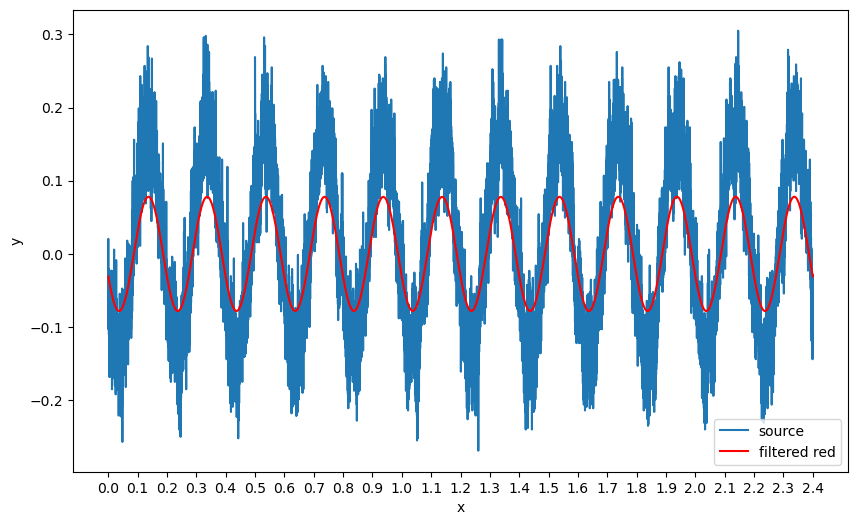

 \left_0\2.csv : 



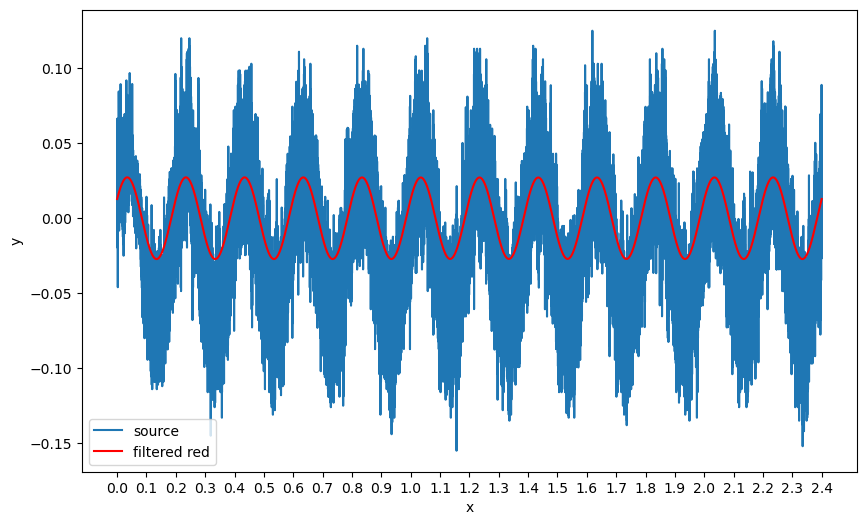

 \left_180\1.csv : 



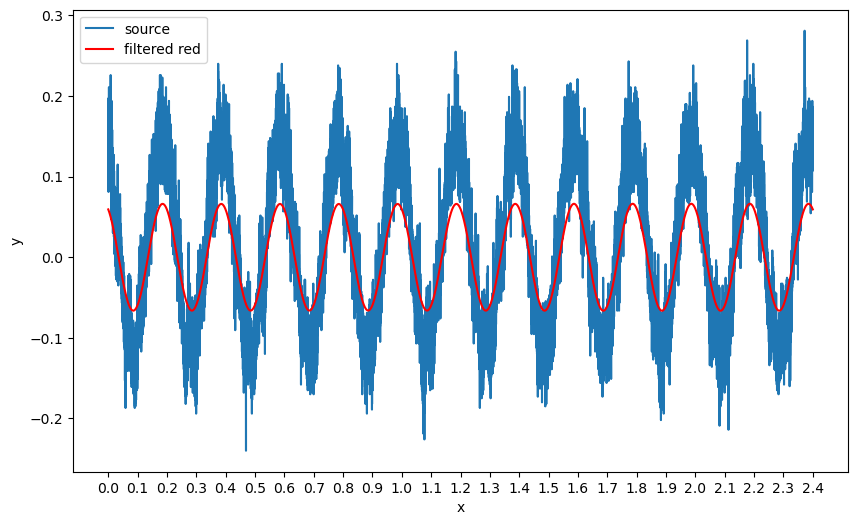

 \left_180\2.csv : 



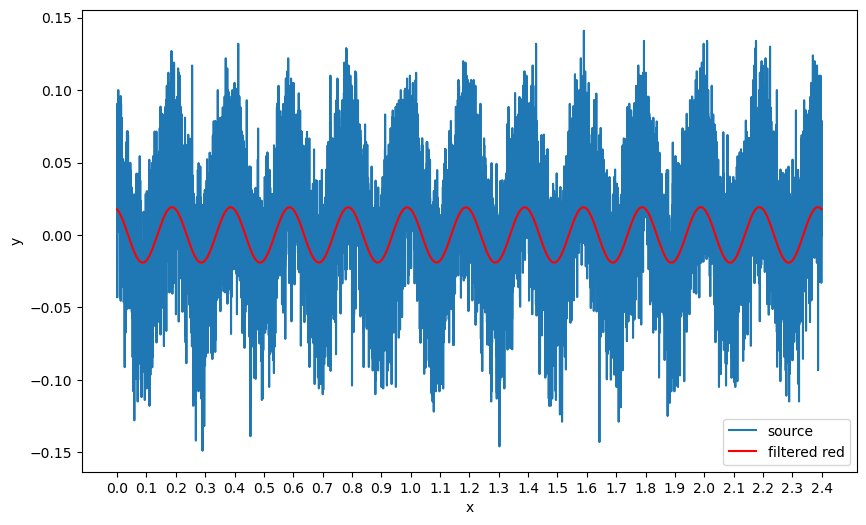

 \left_270\1.csv : 



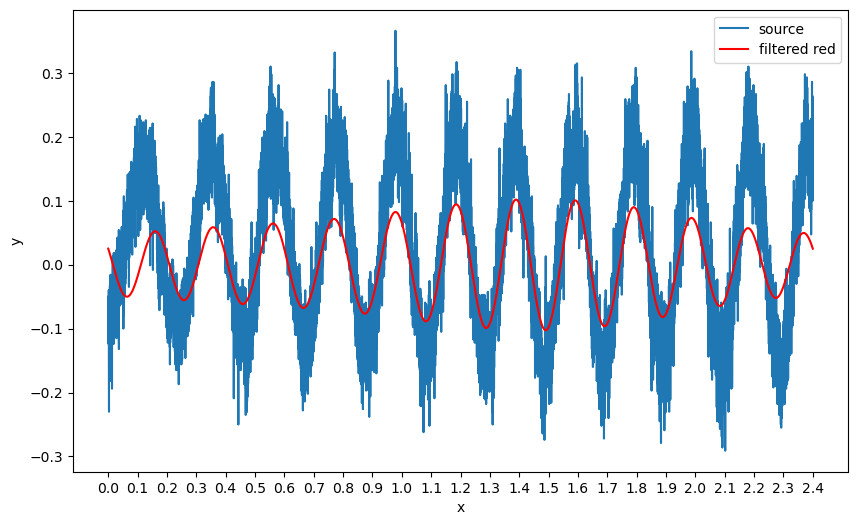

 \left_270\2.csv : 



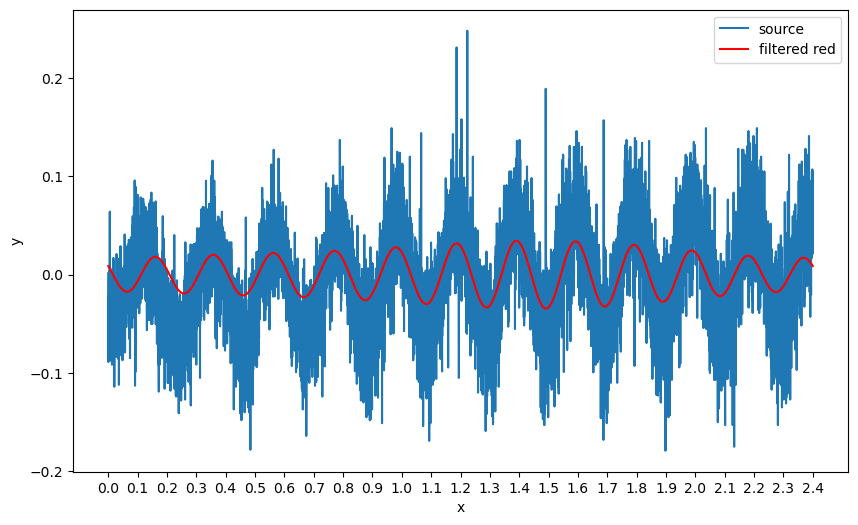

 \left_90\1.csv : 



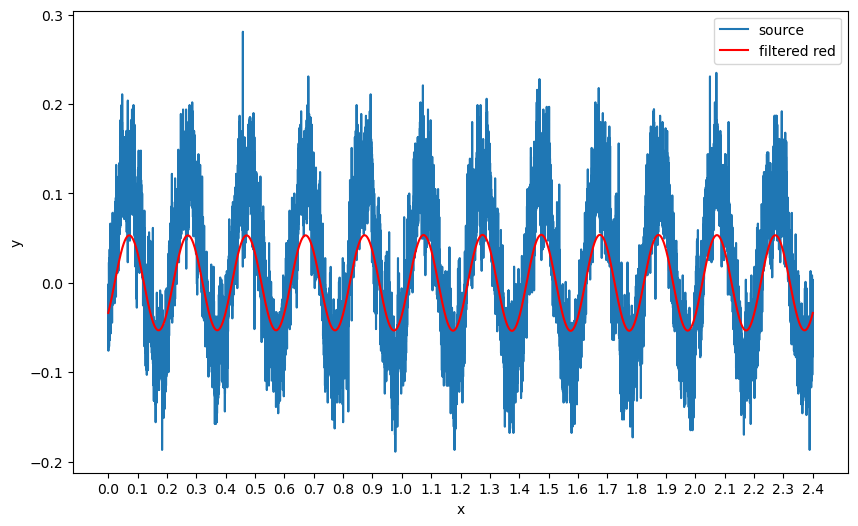

 \left_90\2.csv : 



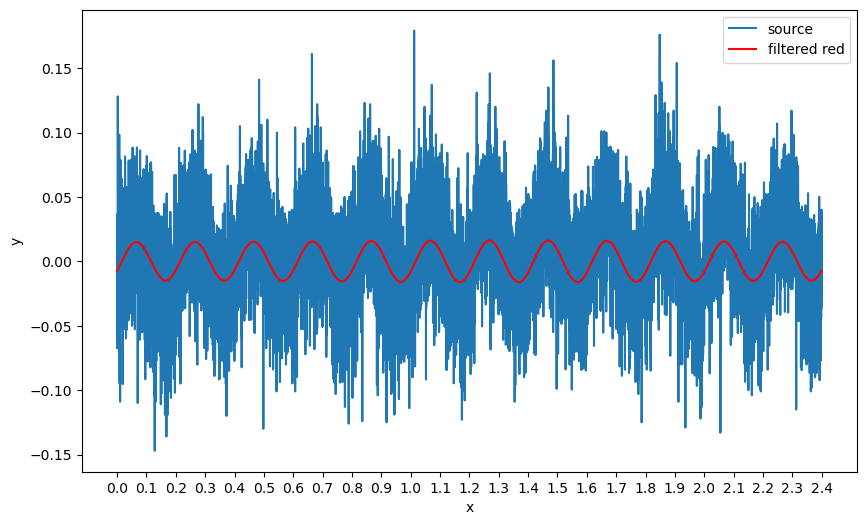

 \right_0\1.csv : 



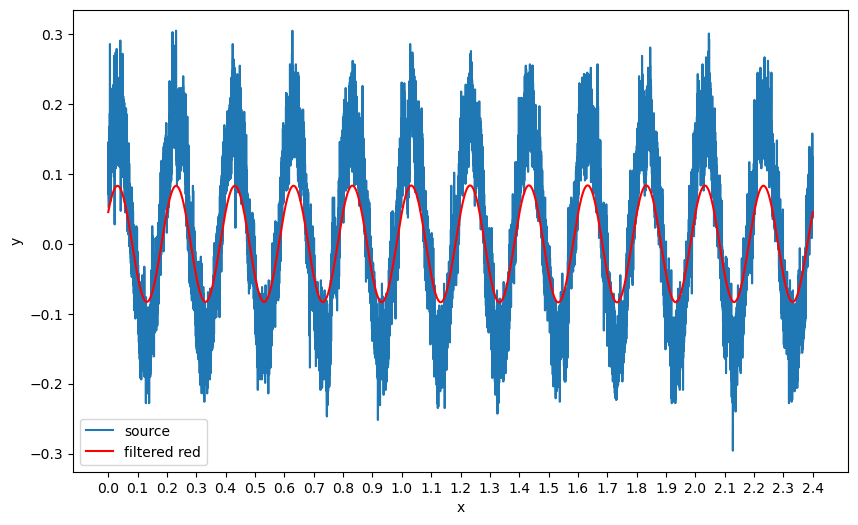

 \right_0\2.csv : 



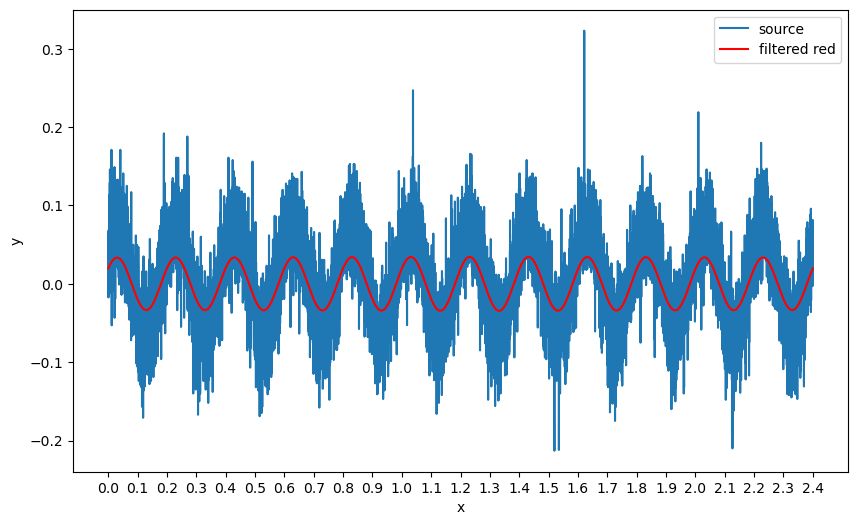

 \right_180\1.csv : 



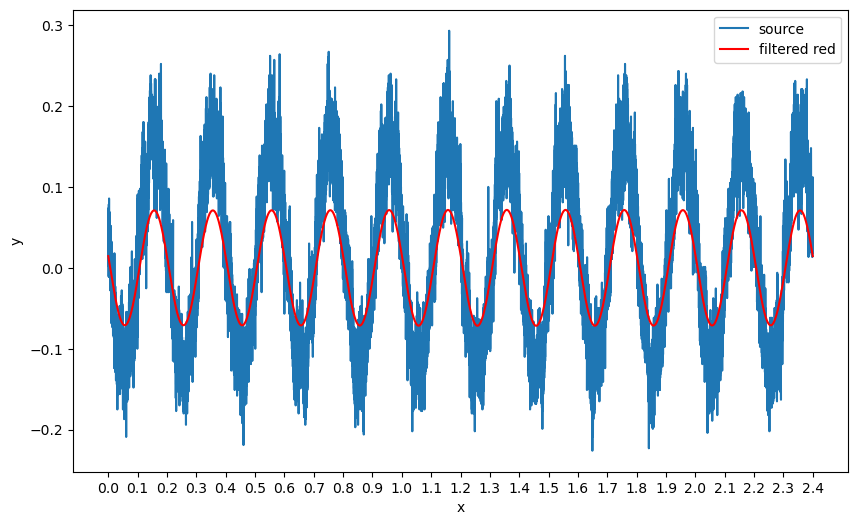

 \right_180\2.csv : 



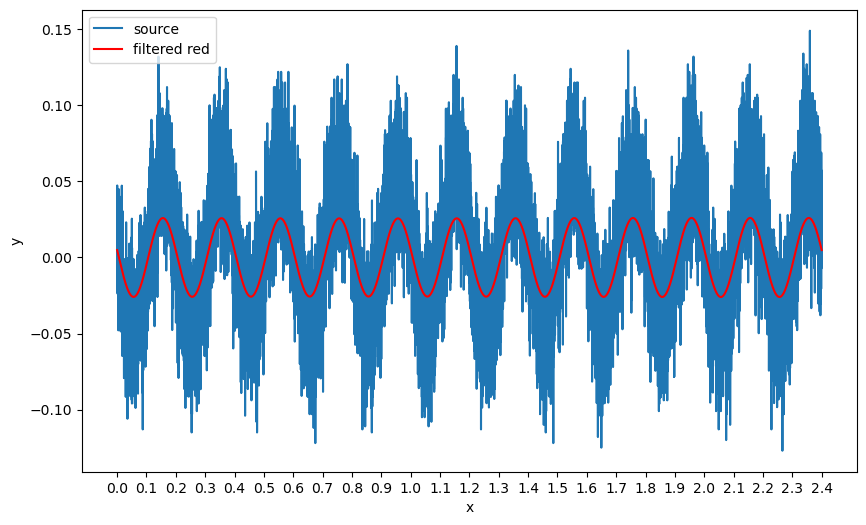

 \right_270\1.csv : 



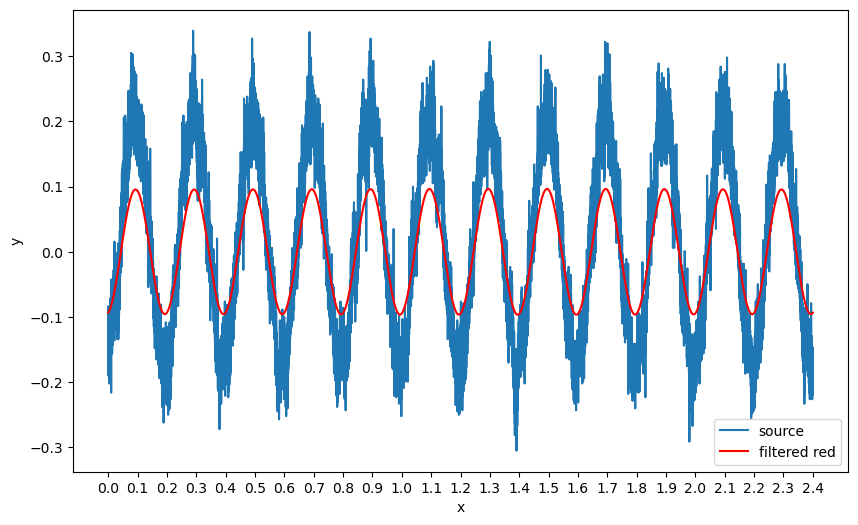

 \right_270\2.csv : 



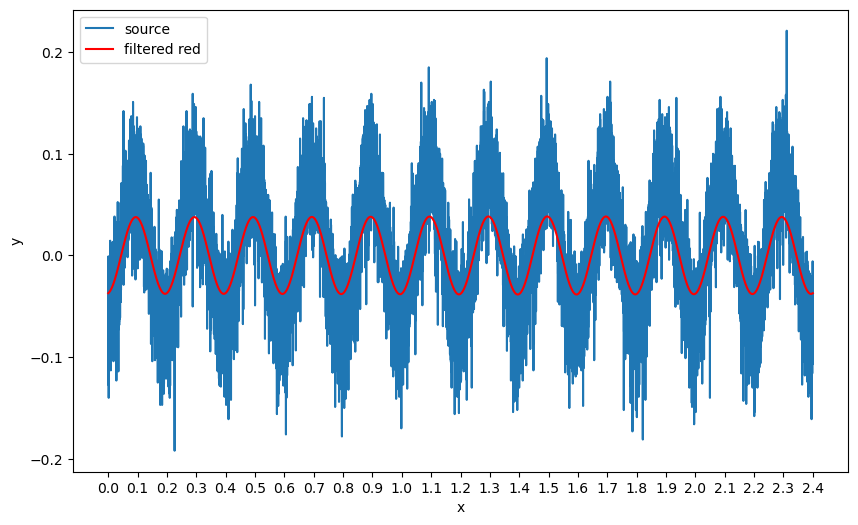

 \right_90\1.csv : 



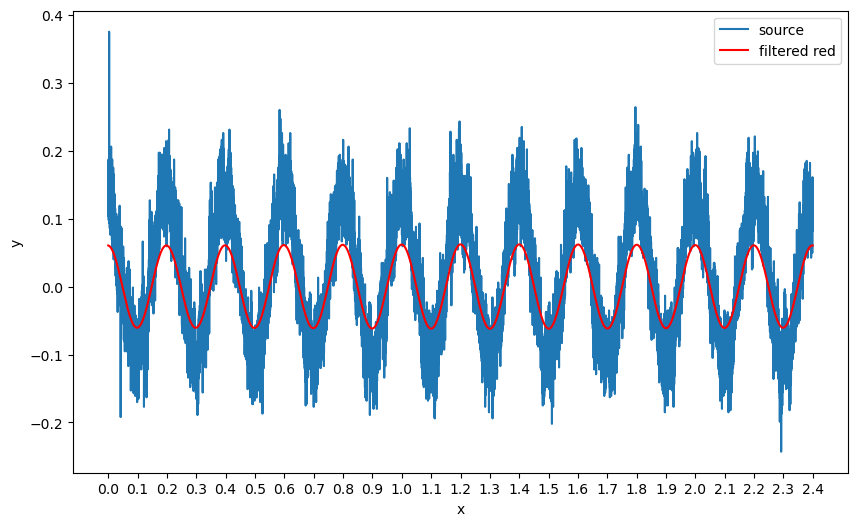

 \right_90\2.csv : 



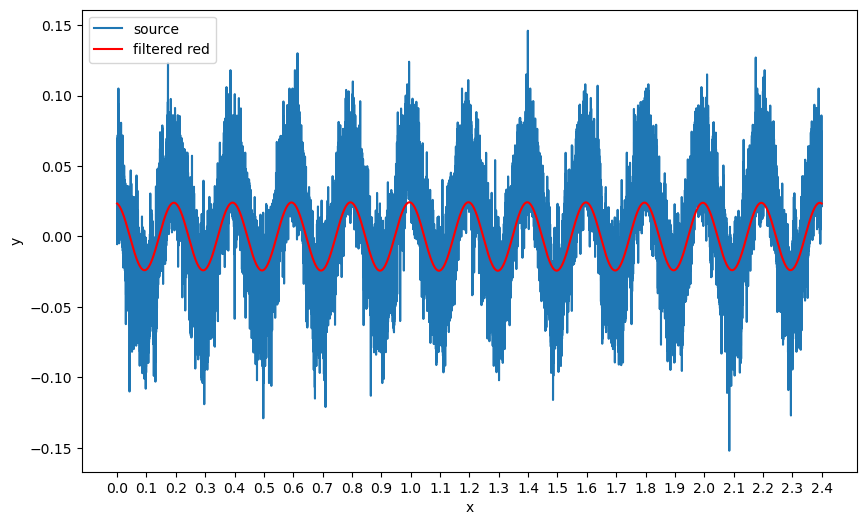

In [21]:
filtered_signals = []

for i in range(len(data_list)):
    filtered_signal = ifft_filter(fft_results[i], fft_freqs[i], params_b[i] / 2 / np.pi, 1)
    filtered_signals.append(filtered_signal)
    print(f" {file_names[i][len(root_dir):]} : \n")
    plot_ifft_figure(data_list[i][0], data_list[i][1], filtered_signal) 

In [ ]:
# #把滤波后的点筛选，写入csv

# for i in range(len(filtered_signals)):
    

# csv_file_path = 'D:\A-deng\hunter\\filtered'

# # 写入 CSV 文件
# with open(csv_file_path, 'w', newline='') as csvfile:
#     csv_writer = csv.writer(csvfile)
    
#     # 写入表头（如果有）
#     # csv_writer.writerow(['Header1', 'Header2', 'Header3'])
    
#     # 写入数据
#     csv_writer.writerows(data_list)

# print(f'Data has been written to {csv_file_path}')

In [13]:
def plot_curve(x, y, b, popt):
    # 模型函数f(x) = acos(bx+c)
    def func_model(x, a, c):
        return a * np.cos(b * x + c)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='source')
    plt.plot(x, func_model(x, *popt), label='fitting', color='red')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show() 

In [14]:
# 计算滤波后逆FFT得到的a
ifft_fit_popts = []
for i in range(len(filtered_signals)):
    max_a = 0
    max_a_index = 0
    for j in range(len(filtered_signals[i])):
        temp_y = filtered_signals[i][j]
        if temp_y > max_a:
            max_a = temp_y
            max_a_index = j
    
    max_x = data_list[i][0][max_a_index]
    c = - max_x * params_b[i]     # 取最大值时 bx+c = 0

    ifft_fit_popts.append([max_a, c])

# print(params_b)

In [ ]:
""" for i in range(len(data_list)):
     plot_curve(data_list[i][0], data_list[i][1], params_b[i], ifft_fit_popts[i])
     plot_curve(data_list[i][0], data_list[i][1], params_b[i], [ifft_fit_popts[i][0], phases[i]]) """

In [15]:
# 保存拟合结果
with open('fit_result_final.txt', 'w+', encoding="utf-8") as f:
    for i in range(len(filtered_signals)):
         f.write(f" {file_names[i][len(root_dir):]} : \n")
         f.write(f" fft + ifft fit : \n s = {ifft_fit_popts[i][0]} *cos( {params_b[i]} *x + {phases[i]} )\n\n\n")
        #  f.write(f"f = {ifft_fit_popts[i][0]} *cos( {params_b[i]} *x + {phases[i]} )\n")
        # f.write(f" fft + opt fit : \n f = {popts[i][0]} *sin( {params_b[i]} *x + {popts[i][1]} )\n\n")

In [100]:
T_list = []
for i in range(len(filtered_signals)):
  if i == 0:
    continue
  if i == 1:
    continue
  # sensor1 和 sensor2对应时刻
  # if i % 2 == 1:
  #   continue
  T = - phases[i] / 31.41592653589793 + 0.2*4
  T_list.append(T)
  # T_list.append(T)

for i in T_list:
  print(i)
# positions=[0,0,180,180,270,270,90,90,0,0,180,180,270,270,90,90]


0.7856758462801798
0.7877246617327996
0.7788081311998926
0.7795838756523576
0.8732118991149044
0.8667389415823199
0.8320576865882018
0.8306125587717199
0.7569778894750789
0.7564927349456299
0.8937059240773353
0.8942487031677326
0.7991613948531957
0.7951003415985266


In [101]:

# T_list=[180,180,270,270,90,90,0,0,180,180,270,270,90,90]

t_values = []
T = 0.2
# # 270
# for i in range(len(T_list)):
#     if i == 0 or i == 1 or i == 8 or i == 9: # 180
#         maxT = T_list[i] - 3 * T / 4
#     if i == 2 or i == 3 or i == 10 or i == 11: # 270
#         maxT = T_list[i]
#     if i == 4 or i == 5 or i == 12 or i == 13: # 90
#         maxT = T_list[i] - T / 2
#     if i == 6 or i == 7: # 0
#         maxT = T_list[i] - T / 4
#     t_values.append(maxT)

# 270最大，修正变化
for i in range(len(T_list)):
    if i == 0 or i == 1 or i == 8 or i == 9: # 180
        maxT = T_list[i] - 7 * T / 8
    if i == 2 or i == 3 or i == 10 or i == 11: # 270
        maxT = T_list[i]
    if i == 4 or i == 5 or i == 12 or i == 13: # 90
        maxT = T_list[i] - 2 * T / 3
    if i == 6 or i == 7: # 0
        maxT = T_list[i] - 5*T / 12
    t_values.append(maxT)

# 0
# for i in range(len(T_list)):
#     if i == 0 or i == 1 or i == 8 or i == 9: # 180
#         maxT = T_list[i] - T / 2
#     if i == 2 or i == 3 or i == 10 or i == 11: # 270
#         maxT = T_list[i] - 3 * T / 4
#     if i == 4 or i == 5 or i == 12 or i == 13: # 90
#         maxT = T_list[i] - T / 4
#     if i == 6 or i == 7: # 0
#         maxT = T_list[i]
#     t_values.append(maxT)

for i in t_values:
  print(i)

0.6106758462801798
0.6127246617327996
0.7788081311998926
0.7795838756523576
0.7398785657815711
0.7334056082489866
0.7487243532548684
0.7472792254383865
0.5819778894750789
0.5814927349456298
0.8937059240773353
0.8942487031677326
0.6658280615198624
0.6617670082651933


In [102]:
import math
 #计算F的值
F_values=[]
Fu=[]
Fv=[]
m=0.03
r=0.1778
T = 0.2
# t_standard = 0.7370743034821594 #0度对应的最大值时刻
params_b_squared=(2 * np.pi * frequency)**2
positions=[0,0,180,180,270,270,90,90,0,0,180,180,270,270,90,90]
# t_values=[]
# for i in range(len(filtered_signals)):
# for i in range(len(t_values)):
    
#     print(f"f = {m*r*params_b_squared} *cos( {params_b[i + 2]} *x + {positions[i + 2]} )\n")
#     angle_radian=math.radians(positions[i + 2])
#     F_value=m*r*params_b_squared*np.cos(params_b[i + 2] * t_values[i] + angle_radian)
#     F_values.append(F_value)

#     if i % 2 == 0:
#       Fu.append(F_value)
#     else:
#       Fv.append(F_value)

# T_list=[180,180,270,270,90,90,0,0,180,180,270,270,90,90]

# # 0度
# Fv= [-5.2644469875410635,0,0,0,0,0,0]  
# Fu= [0, 0, 0,5.2644469875410635,-5.2644469875410635,0,0]
# # 270度  
# Fu= [0, 0, 0,0,0,5.2644469875410635,-5.2644469875410635]
# Fv= [0,5.2644469875410635,-5.2644469875410635,0,0,0,0]

Fu= [0, 0, 0,-4.559144828087022,3.721964020191532,5.2644469875410635,-2.632223493770532]
Fv= [3.721964020191532,5.2644469875410635,-2.632223493770532,0,0,0,0]

print(F_values)
print("Fu:", Fu)
print("Fv:", Fv)

F = np.vstack((Fu, Fv))
print(F) 


[]
Fu: [0, 0, 0, -4.559144828087022, 3.721964020191532, 5.2644469875410635, -2.632223493770532]
Fv: [3.721964020191532, 5.2644469875410635, -2.632223493770532, 0, 0, 0, 0]
[[ 0.          0.          0.         -4.55914483  3.72196402  5.26444699
  -2.63222349]
 [ 3.72196402  5.26444699 -2.63222349  0.          0.          0.
   0.        ]]


In [103]:
#取t=1,计算Su\Sv
Su=[]
Sv=[]
S_values=[]
for i in range(len(t_values)):
  S_value = ifft_fit_popts[i+2][0]*np.cos(params_b[i+2] * t_values[i] +phases[i+2])
  S_values.append(S_value)

  if i % 2 == 0:
      Su.append(S_value)
  else:
        Sv.append(S_value)
# print(S_values)
print("Su:", Su)
print("Sv:", Sv)

S = np.vstack((Su, Sv))
print(S)

Su: [0.04691248291232228, 0.10184178151955646, -0.02688250523093311, -0.07249790987192095, 0.050629308790105715, 0.09647970892219007, -0.031048739720495537]
Sv: [0.013556267582778845, 0.034332658747799186, -0.00807408113361535, -0.0297772028577113, 0.018369757758624473, 0.03838411245905501, -0.012153519776609901]
[[ 0.04691248  0.10184178 -0.02688251 -0.07249791  0.05062931  0.09647971
  -0.03104874]
 [ 0.01355627  0.03433266 -0.00807408 -0.0297772   0.01836976  0.03838411
  -0.01215352]]


In [104]:
def target_function(S, *parameters):
    A_11, A_12, A_21, A_22 = parameters
    A = np.array([[A_11, A_12], [A_21, A_22]])
    return np.dot(A, S).flatten()

In [105]:
def optimize_A(S_list, F_list):
 
    # S_flat = np.concatenate([S.flatten() for S in S_list])
    # F_flat = np.concatenate([F.flatten() for F in F_list])

    initial_guess_A = [2,2,2,2]

    optimized_A_flat, _ = curve_fit(target_function, S_list, F_list.flatten(), p0=initial_guess_A)

    optimized_A = optimized_A_flat.reshape((2, 2))

    return optimized_A

In [106]:
S_flat = np.concatenate([S.flatten() for S in S])
F_flat = np.concatenate([F.flatten() for F in F])
print(S.shape)
print(F.shape)

(2, 7)
(2, 7)


In [107]:
# F=np.array([[ 5.26444699e+00, -5.26444699e+00, -1.67656878e-14, -2.58209385e-15, 0, 0, 0],[ 0, 0, 0, 0, 5.26444699e+00, -5.26444699e+00, -1.67656878e-14]])
# F = np.array([[-5.26444699e+00,  5.26444699e+00,  3.86923047e-14, -1.93445230e-14,
#   0,  0,  0],
#  [0,  0,  0, 0,
#   -5.26444699e+00,  5.26444699e+00,  3.86923047e-14]])
# F = np.array([[-2.09076402,  2.09076402, -4.83147057,  4.83147057, 0, 0, 0],
#  [0, 0, 0, 0, -2.09076402,  2.09076402, -4.83147057]])
# F = np.array([[-5.26444699e+00,  5.26444699e+00,  4.12711399e-14, -2.19233583e-14, 0, 0, 0]
# , [0, 0, 0, 0, -5.26444699e+00,  5.26444699e+00,  4.12711399e-14]])
A_matrix = optimize_A(S, F)

# 输出结果
print("Optimized A matrix:")
print(A_matrix)
print(A_matrix.dot(S) - F) # AS

Optimized A matrix:
[[-217.95387464  690.12090585]
 [ 302.6699126  -756.86738846]]
[[-0.86929376  1.49687467  0.28705399 -0.18952502 -2.07946418  0.19710509
   1.01201854]
 [ 0.21673624 -0.42527364  0.60670669  0.59445772  1.42049788  0.14982211
  -0.19891656]]


In [75]:
# F=np.array([[ 5.26444699e+00, -5.26444699e+00, -1.67656878e-14, -2.58209385e-15, 0, 0, 0],[ 0, 0, 0, 0, 5.26444699e+00, -5.26444699e+00, -1.67656878e-14]])
# F = np.array([[-2.09076402,  2.09076402, -4.83147057,  4.83147057, 0, 0, 0],
#  [0, 0, 0, 0, -2.09076402,  2.09076402, -4.83147057]]) #1.937
'''
    coefficients是系数阵A
    residuals是残差项
    F = AS -> F' = S'A'
'''
# 使用numpy的lstsq函数进行最小二乘拟合
coefficients, residuals, rank, singular_values = np.linalg.lstsq(S.T, F.T, rcond=None)
A = coefficients.T
# print(F)    # F
# print(A.dot(S)) # AS
print(A.dot(S) - F) # AS

# print(np.dot(A,S))
# print(S)
print(A)

[[-7.42042466e-01  5.90563640e-14 -2.46714951e-15  9.06726275e-01
   1.74768488e+00 -5.33807741e-14 -4.09504094e-14]
 [ 6.54761146e-01 -8.29924876e-14 -8.99694424e-15 -8.00074338e-01
  -1.54211680e+00  8.82230172e-14  5.62136276e-14]]
[[-137.2201875   513.56635731]
 [ 257.05723885 -649.12064871]]


In [41]:
T_list = []
for i in range(len(filtered_signals)):
  if i == 0:
    continue
  if i == 1:
    continue
  T = - phases[i] / 31.41592653589793 + 0.2*4
  T_list.append(T)
for i in T_list:
  print(i)
# positions=[0,0,180,180,270,270,90,90,0,0,180,180,270,270,90,90]


0.7856758462801798
0.7877246617327996
0.7788081311998926
0.7795838756523576
0.8732118991149044
0.8667389415823199
0.8320576865882018
0.8306125587717199
0.7569778894750789
0.7564927349456299
0.8937059240773353
0.8942487031677326
0.7991613948531957
0.7951003415985266


In [42]:
t_values = []
T = 0.2
for i in range(len(T_list)):
    if i == 0 or i == 1 or i == 8 or i == 9: # 180
        maxT = T_list[i] - T / 2
    if i == 2 or i == 3 or i == 10 or i == 11: # 270
        maxT = T_list[i] - 3 * T / 4
    if i == 4 or i == 5 or i == 12 or i == 13: # 90
        maxT = T_list[i] - T / 4
    if i == 6 or i == 7: # 0
        maxT = T_list[i]
    t_values.append(maxT)

for i in t_values:
  print(i)

0.6856758462801799
0.6877246617327997
0.6288081311998925
0.6295838756523576
0.8232118991149043
0.8167389415823199
0.8320576865882018
0.8306125587717199
0.656977889475079
0.6564927349456299
0.7437059240773353
0.7442487031677326
0.7491613948531957
0.7451003415985266
